<a href="https://colab.research.google.com/github/jnprogrammer/MachineLearning/blob/master/Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
# build the dataset
# This is a nonlinear AND long-distance dataset
# (actually we will test long-distance vs. short-distance patterns)

#start with small T and increase it later

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) #short distance
  # y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# make visualization with xor3d.py 


In [4]:
# exmaple of a linear model that will fail
# it's classifcation now

i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 0s 159us/sample - loss: 0.7889 - accuracy: 0.5024 - val_loss: 0.7032 - val_accuracy: 0.4948
Epoch 2/100
2500/2500 [==============================] - 0s 77us/sample - loss: 0.6971 - accuracy: 0.4868 - val_loss: 0.6933 - val_accuracy: 0.5032
Epoch 3/100
2500/2500 [==============================] - 0s 76us/sample - loss: 0.6947 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy: 0.5092
Epoch 4/100
2500/2500 [==============================] - 0s 76us/sample - loss: 0.6957 - accuracy: 0.4908 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 5/100
2500/2500 [==============================] - 0s 74us/sample - loss: 0.6957 - accuracy: 0.5084 - val_loss: 0.6925 - val_accuracy: 0.5148
Epoch 6/100
2500/2500 [==============================] - 0s 82us/sample - loss: 0.6959 - accuracy: 0.4964 - val_loss:

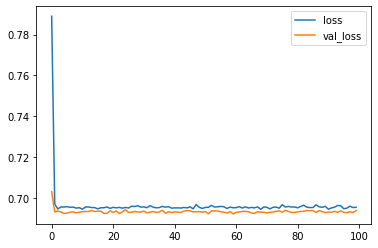

In [5]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

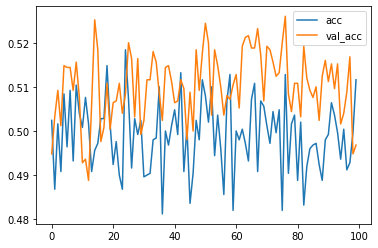

In [6]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# now I'm trying a simple RNN to solve this problem
inputs = np.expand_dims(X, -1)

#make the RNN
i = Input(shape=(T, D))

#method1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

#method2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rsmprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)


In [8]:
# train the RNN
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 461us/sample - loss: 0.6869 - accuracy: 0.5416 - val_loss: 0.6730 - val_accuracy: 0.5656
Epoch 2/200
2500/2500 [==============================] - 0s 180us/sample - loss: 0.6306 - accuracy: 0.6812 - val_loss: 0.5754 - val_accuracy: 0.7896
Epoch 3/200
2500/2500 [==============================] - 0s 182us/sample - loss: 0.4952 - accuracy: 0.8384 - val_loss: 0.4336 - val_accuracy: 0.8768
Epoch 4/200
2500/2500 [==============================] - 0s 177us/sample - loss: 0.3671 - accuracy: 0.9028 - val_loss: 0.3412 - val_accuracy: 0.8932
Epoch 5/200
2500/2500 [==============================] - 0s 187us/sample - loss: 0.2908 - accuracy: 0.9196 - val_loss: 0.2848 - val_accuracy: 0.9044
Epoch 6/200
2500/2500 [==============================] - 0s 185us/sample - loss: 0.2404 - accuracy: 0.9296 - val_loss: 0.2409 - val_accuracy: 0.9216
Epoch 7/200
2500/2500 [==============================] - 0

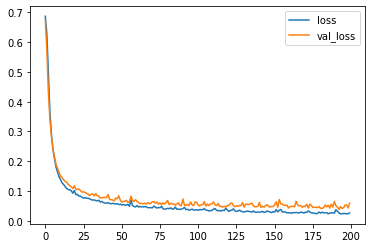

In [9]:
# plotting the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

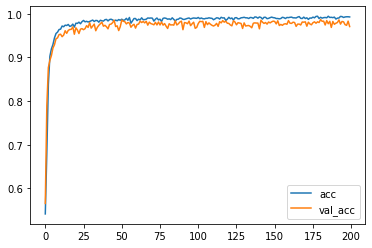

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now im trying the Long distance problem

#start with a small T and increase it later

T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN

i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# train the RNN

r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 478us/sample - loss: 0.7654 - accuracy: 0.4740 - val_loss: 0.6993 - val_accuracy: 0.4908
Epoch 2/200
2500/2500 [==============================] - 0s 192us/sample - loss: 0.6933 - accuracy: 0.5276 - val_loss: 0.6938 - val_accuracy: 0.5040
Epoch 3/200
2500/2500 [==============================] - 0s 193us/sample - loss: 0.6856 - accuracy: 0.5552 - val_loss: 0.6634 - val_accuracy: 0.6052
Epoch 4/200
2500/2500 [==============================] - 0s 198us/sample - loss: 0.6486 - accuracy: 0.6248 - val_loss: 0.5864 - val_accuracy: 0.6992
Epoch 5/200
2500/2500 [==============================] - 0s 199us/sample - loss: 0.5727 - accuracy: 0.7012 - val_loss: 0.5468 - val_accuracy: 0.7336
Epoch 6/200
2500/2500 [==============================] - 1s 204us/sample - loss: 0.5513 - accuracy: 0.7276 - val_loss: 0.5618 - val_accuracy: 0.7188
Epoch 7/200
2500/2500 [==============================] - 0

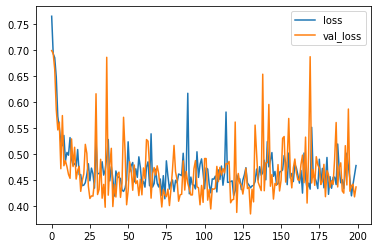

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [14]:
input = np.expand_dims(X, -1)

#makes the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 955us/sample - loss: 0.6930 - accuracy: 0.5092 - val_loss: 0.6950 - val_accuracy: 0.5108
Epoch 2/200
2500/2500 [==============================] - 1s 296us/sample - loss: 0.6916 - accuracy: 0.5328 - val_loss: 0.6946 - val_accuracy: 0.5048
Epoch 3/200
2500/2500 [==============================] - 1s 284us/sample - loss: 0.6918 - accuracy: 0.5296 - val_loss: 0.6940 - val_accuracy: 0.5048
Epoch 4/200
2500/2500 [==============================] - 1s 286us/sample - loss: 0.6911 - accuracy: 0.5276 - val_loss: 0.6949 - val_accuracy: 0.5056
Epoch 5/200
2500/2500 [==============================] - 1s 301us/sample - loss: 0.6907 - accuracy: 0.5260 - val_loss: 0.6953 - val_accuracy: 0.5100
Epoch 6/200
2500/2500 [==============================] - 1s 297us/sample - loss: 0.6903 - accuracy: 0.5292 - val_loss: 0.6954 - val_accuracy: 0.5056
Epoch 7/200
2500/2500 [==============================] - 1

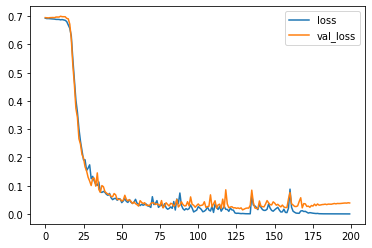

In [15]:
#loss plot
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

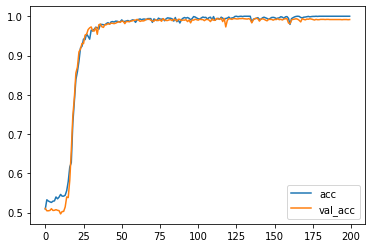

In [16]:

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend(
)

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
#Retesting the Simple RNN again
inputs = np.expand_dims(X, -1)

# create the RNN
i = Input(shape=(T, D))

# method 1 
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y, 
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 562us/sample - loss: 0.7039 - accuracy: 0.5008 - val_loss: 0.6973 - val_accuracy: 0.4944
Epoch 2/200
2500/2500 [==============================] - 1s 287us/sample - loss: 0.6947 - accuracy: 0.5164 - val_loss: 0.6977 - val_accuracy: 0.4820
Epoch 3/200
2500/2500 [==============================] - 1s 252us/sample - loss: 0.6928 - accuracy: 0.5256 - val_loss: 0.6962 - val_accuracy: 0.4936
Epoch 4/200
2500/2500 [==============================] - 1s 268us/sample - loss: 0.6918 - accuracy: 0.5148 - val_loss: 0.6985 - val_accuracy: 0.4976
Epoch 5/200
2500/2500 [==============================] - 1s 266us/sample - loss: 0.6919 - accuracy: 0.5216 - val_loss: 0.6975 - val_accuracy: 0.4840
Epoch 6/200
2500/2500 [==============================] - 1s 281us/sample - loss: 0.6917 - accuracy: 0.5232 - val_loss: 0.6988 - val_accuracy: 0.4880
Epoch 7/200
2500/2500 [==============================] - 1

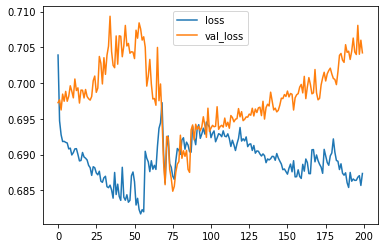

In [19]:
#loss plot
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

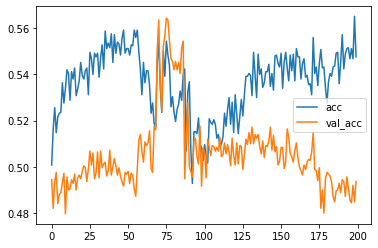

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [21]:
# Now test out LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6947 - accuracy: 0.5012 - val_loss: 0.6927 - val_accuracy: 0.5120
Epoch 2/200
2500/2500 [==============================] - 1s 480us/sample - loss: 0.6938 - accuracy: 0.4984 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 3/200
2500/2500 [==============================] - 1s 487us/sample - loss: 0.6939 - accuracy: 0.4992 - val_loss: 0.6938 - val_accuracy: 0.4856
Epoch 4/200
2500/2500 [==============================] - 1s 490us/sample - loss: 0.6936 - accuracy: 0.4916 - val_loss: 0.6935 - val_accuracy: 0.4884
Epoch 5/200
2500/2500 [==============================] - 1s 479us/sample - loss: 0.6936 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.4912
Epoch 6/200
2500/2500 [==============================] - 1s 470us/sample - loss: 0.6933 - accuracy: 0.5076 - val_loss: 0.6943 - val_accuracy: 0.4816
Epoch 7/200
2500/2500 [==============================] - 1s 

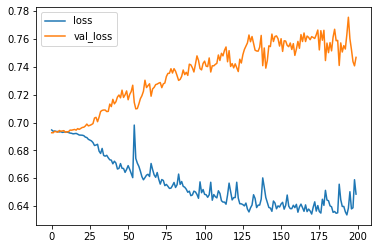

In [22]:
#loss plot
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

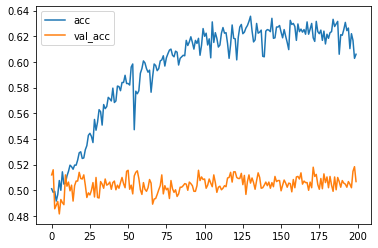

In [23]:
#plot Accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [24]:
# Now test our GNU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

#method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)


#train the RNN
r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)


Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6955 - accuracy: 0.4964 - val_loss: 0.6930 - val_accuracy: 0.5164
Epoch 2/400
2500/2500 [==============================] - 1s 562us/sample - loss: 0.6948 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 3/400
2500/2500 [==============================] - 1s 548us/sample - loss: 0.6946 - accuracy: 0.4920 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 4/400
2500/2500 [==============================] - 1s 555us/sample - loss: 0.6937 - accuracy: 0.5148 - val_loss: 0.6928 - val_accuracy: 0.5180
Epoch 5/400
2500/2500 [==============================] - 1s 551us/sample - loss: 0.6942 - accuracy: 0.4896 - val_loss: 0.6940 - val_accuracy: 0.4896
Epoch 6/400
2500/2500 [==============================] - 1s 532us/sample - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6935 - val_accuracy: 0.5012
Epoch 7/400
2500/2500 [==============================] - 1s 

In [0]:
# make an even larger T thus making the problem harder
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [26]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T,D))

x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs, Y, 
    epochs=400,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 4s 1ms/sample - loss: 0.6931 - accuracy: 0.5132 - val_loss: 0.6949 - val_accuracy: 0.5088
Epoch 2/400
2500/2500 [==============================] - 2s 670us/sample - loss: 0.6921 - accuracy: 0.5188 - val_loss: 0.6941 - val_accuracy: 0.5012
Epoch 3/400
2500/2500 [==============================] - 2s 672us/sample - loss: 0.6932 - accuracy: 0.5096 - val_loss: 0.6936 - val_accuracy: 0.5080
Epoch 4/400
2500/2500 [==============================] - 2s 674us/sample - loss: 0.6922 - accuracy: 0.5244 - val_loss: 0.6938 - val_accuracy: 0.5116
Epoch 5/400
2500/2500 [==============================] - 2s 682us/sample - loss: 0.6921 - accuracy: 0.5152 - val_loss: 0.6942 - val_accuracy: 0.5116
Epoch 6/400
2500/2500 [==============================] - 2s 669us/sample - loss: 0.6925 - accuracy: 0.5276 - val_loss: 0.6944 - val_accuracy: 0.5104
Epoch 7/400
2500/2500 [==============================] - 2s 

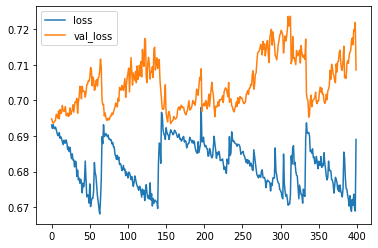

In [27]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [34]:
# a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method2 
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs, Y, 
    epochs=100,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6939 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 2/100
2500/2500 [==============================] - 2s 711us/sample - loss: 0.6932 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.5084
Epoch 3/100
2500/2500 [==============================] - 2s 754us/sample - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5068
Epoch 4/100
2500/2500 [==============================] - 2s 746us/sample - loss: 0.6921 - accuracy: 0.5156 - val_loss: 0.6932 - val_accuracy: 0.5088
Epoch 5/100
2500/2500 [==============================] - 2s 732us/sample - loss: 0.6928 - accuracy: 0.5108 - val_loss: 0.6928 - val_accuracy: 0.5088
Epoch 6/100
2500/2500 [==============================] - 2s 745us/sample - loss: 0.6927 - accuracy: 0.4980 - val_loss: 0.6928 - val_accuracy: 0.5108
Epoch 7/100
2500/2500 [==============================] - 2s 

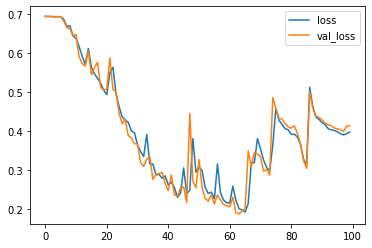

In [36]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

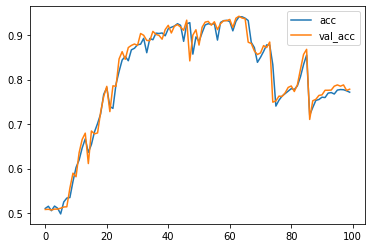

In [37]:
# plot the accyracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
